# Демонстрационная тетрадь к статье "Обнаружение печатей в документах"

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [2]:
def T(im):
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

### Шаг 1

In [3]:
import cv2
import numpy as np

### Шаг 2

In [4]:
im = cv2.imread('Akkr_SU_05.06.2019-6.jpg')

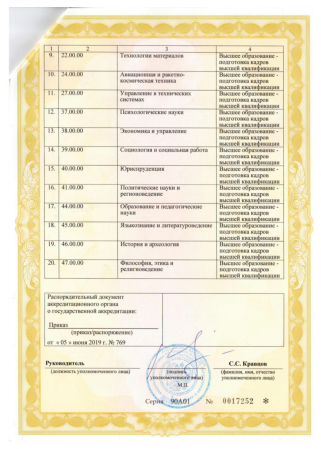

In [5]:
plt.figure(figsize=(8,8))
plt.axis('off')
imshow(T(im))

### Шаг 3

In [6]:
hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
blue_lower = np.array([80, 30, 30])
blue_higher = np.array([140, 250, 250])
mask = cv2.inRange(hsv, blue_lower, blue_higher)
selection = cv2.bitwise_and(im, im, mask=mask)

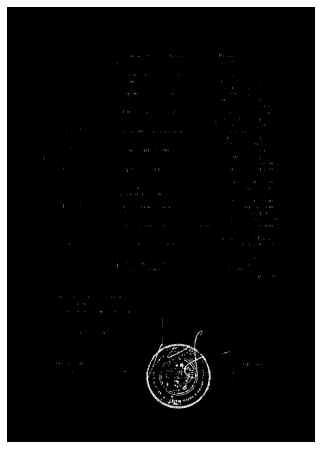

In [7]:
plt.figure(figsize=(8,8))
plt.axis('off')
imshow(T(mask))

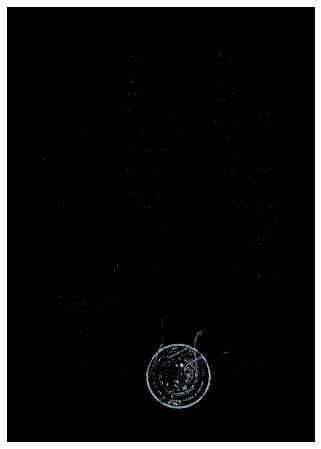

In [8]:
plt.figure(figsize=(8,8))
plt.axis('off')
imshow(T(selection))

### Шаг 4

In [9]:
gray = cv2.cvtColor(selection, cv2.COLOR_BGR2GRAY)

In [10]:
cv2.imwrite('step4.jpg', gray)

True

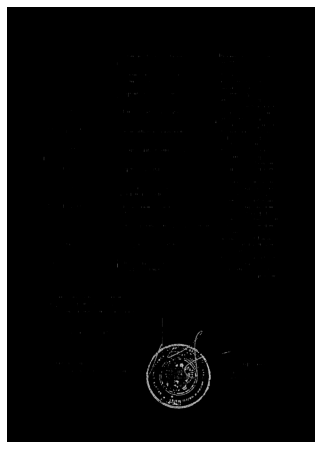

In [11]:
plt.figure(figsize=(8,8))
plt.axis('off')
imshow(T(gray))

### Шаг 5

In [12]:
blur = cv2.GaussianBlur(gray, (5,5), 2)

In [13]:
cv2.imwrite('step5.jpg', blur)

True

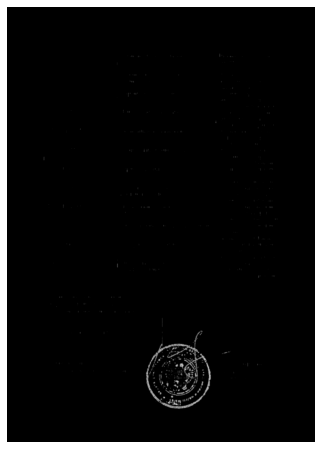

In [14]:
plt.figure(figsize=(8,8))
plt.axis('off')
imshow(T(blur))

### Шаг 6

In [15]:
h, w = gray.shape
r_min = int(w * 0.10 / 2)
r_max = int(w * 0.27 / 2)
contours = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, dp=1, minDist=2 * r_min)

In [16]:
contours

array([[[ 921.5, 1978.5,  167.3]]], dtype=float32)

### Шаг 7

In [17]:
boxes = []

if contours is not None:
    for contour in contours[0]:
        xc, yc, r = np.uint(np.rint(contour))
        if r_min <= r <= r_max:
            x1 = xc - r
            y1 = yc - r
            x2 = xc + r
            y2 = yc + r
            boxes.append([x1, y1, x2, y2])       

In [18]:
boxes

[[755, 1811, 1089, 2145]]

In [19]:
im_boxes = im.copy()
for box in boxes:
    cv2.rectangle(im_boxes, (box[0],box[1]), (box[2],box[3]), (0, 0, 255), 5)

In [20]:
cv2.imwrite('im_boxes.jpg', im_boxes)

True

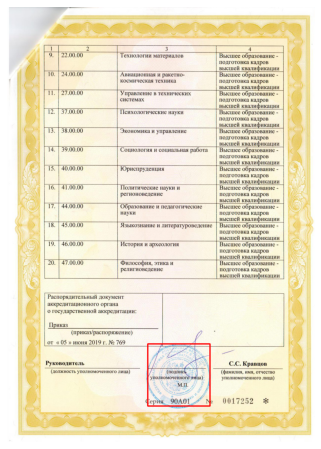

In [21]:
plt.figure(figsize=(8,8))
plt.axis('off')
imshow(T(im_boxes))

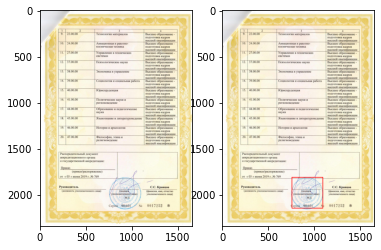

In [22]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(T(im))
axarr[1].imshow(T(im_boxes))